<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Electricity-Consumption-Forecasting/blob/main/Electricity_Consumption_Forecasting_Using_5_Different_Models_XGBoost%2C_Random_Forest_Regression%2C_Linear_Regression%2C_MLP%2C_and_Ridge_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
Program Flow: This program loads the dataset, resamples it to hourly frequency, and splits it into training and testing sets. It then defines 5 different models: XGBoost, Random Forest Regression, Linear Regression, MLP, and Ridge Regression, and trains and evaluates each model using the mean squared error (MSE) and R-squared (R2) metric. Finally, it plots the results using matplotlib to compare the performance of each model.
***

In [28]:
# Importing the necessary modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [29]:
# Loading the dataset
df = pd.read_csv('/content/electricityConsumptionAndProductioction.csv')
df.head(8)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
5,2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
6,2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
7,2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34


In [30]:
# Converting DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Resampling the data to hourly frequency
df_resampled = df.resample('H').mean()

In [31]:
# Splitting the data into training and testing sets
X = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']]
y = df['Consumption']

In [32]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Defining the models
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'MLP': MLPRegressor(random_state=42),
    'Ridge Regression': Ridge(random_state=42)
}

In [34]:
# Training and evaluating each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [35]:
# Printing the results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")

Model Performance:
XGBoost:
  MSE: 184278.80
  R2: 0.83
Random Forest:
  MSE: 141324.17
  R2: 0.87
Linear Regression:
  MSE: 361904.77
  R2: 0.67
MLP:
  MSE: 294413.14
  R2: 0.73
Ridge Regression:
  MSE: 361904.77
  R2: 0.67


***
Overall, the results suggest that the Random Forest Regression and XGBoost models are the most suitable for this electricity load forecasting task, as they were able to achieve the highest R2 scores and the lowest MSEs. The MLP model also performed reasonably well, but the linear models (Linear Regression and Ridge Regression) were not as effective in this case.
***

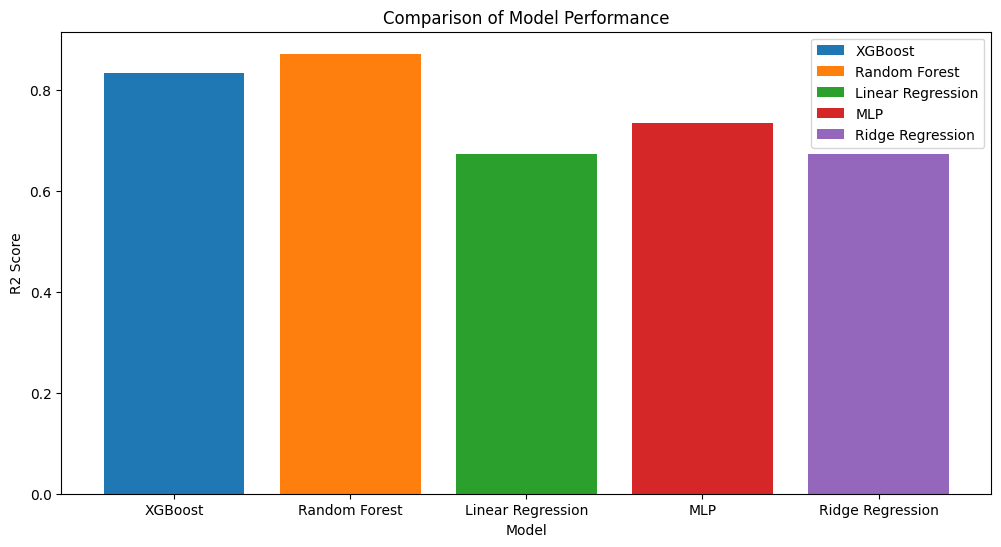

In [36]:
# Visualising the results
plt.figure(figsize=(12, 6))
for name, metrics in results.items():
    plt.bar(name, metrics['R2'], label=name)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()

***
It's worth noting that the performance of the models may depend on the specific characteristics of the dataset and the problem at hand. Also, other techniques like hyperparameter optimization can play a crucial role in improving the performance of the models, especially for more complex models like XGBoost and MLP.

XGBoost has several hyperparameters that can be tuned, such as the learning rate, max_depth, n_estimators, and regularization parameters.

By optimizing the hyperparameters of each of the models, it's possible to further improve their performance.

***